# Book recommending system

The basic idea behind this analysis of Goodreads dataset is to indentify the relation between different attributes classified like the average ratings of the books, the popularity of the authors, number of people reviewing and rating the books.
As the time passes the populairty and significaiton of these books will alwayas be increasing presenting the magical effect of stories.

 # What we will be doing in this Kernel

1. Loading appropriate libraries and installaitons
2. Acquiring the dataset
3. Exploring and Analysing the data
    A.Books with the most occurence in the list
    B.Books having high rating counts
    C.Books having hight average ratings
    D.Auhtors wiht maximum books
4. Further analysis about the relation of authors wiht the ratings of there books to select the top ones to recoomend

First we imported the pandas library, numpy library, for the graphical observation purpose we imported the matplotlib and seaborn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the Goodreads data set.

In [2]:
df=pd.read_csv(r"C:/Users/MANASVI/Desktop/Dataset/books.csv",error_bad_lines=False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


Now as we have imported the dataset successfully, we will dive into the dataset taking a quick look at the features.

In [3]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [4]:
df.tail()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco
11122,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros


In [5]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

### Columns Description:
   
        bookID:  Contains the unique ID for each book/series
        title:  contains the titles of the books
        authors:  contains the author of the particular book
        average_rating:  the average rating of the books, as decided by the users
        ISBN ISBN(10):  number, tells the information about a book - such as edition and publisher
        ISBN 13:  The new format for ISBN, implemented in 2007. 13 digits
        language_code:  Tells the language for the books
        Num_pages:  Contains the number of pages for the book
        Ratings_count:  Contains the number of ratings given for the book
        text_reviews_count:  Has the count of reviews left by users

## Books with most occurence 

In [6]:
df['title'].value_counts()

The Iliad                                       9
The Brothers Karamazov                          9
The Odyssey                                     8
'Salem's Lot                                    8
Anna Karenina                                   8
                                               ..
The Cat in the Hat                              1
City of Golden Shadow (Otherland  #1)           1
The Catcher in the Rye - Barron's Book Notes    1
Den of Thieves (Cat Royal  #3)                  1
Pat of Silver Bush (Pat  #1)                    1
Name: title, Length: 10348, dtype: int64

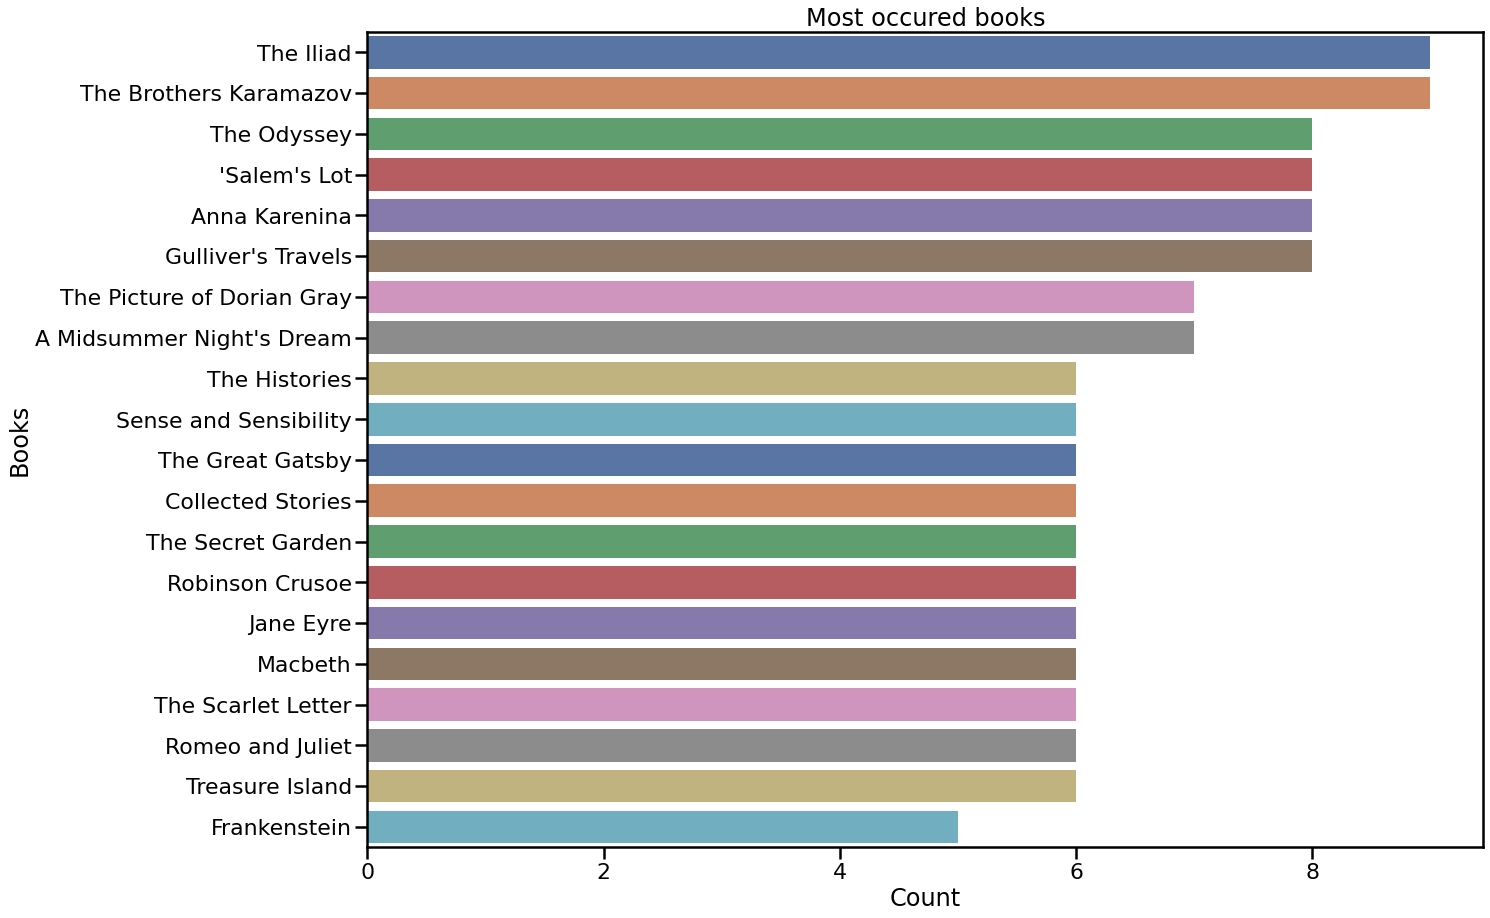

In [7]:
sns.set_context('poster')
plt.figure(figsize=(20,15))
book=df['title'].value_counts()[:20]
sns.barplot(x=book,y=book.index,palette='deep')
plt.title("Most occured books")
plt.xlabel("Count")
plt.ylabel("Books")
plt.show()

As we can see from the bargraph above that books "The Brothers Karamazov" and "The LLiad" have the most occurence with the same name in the data.
Most of these books have been published from time to time through new publication houses, making there places in the dataset multiple times.

## Books with high rating counts

Here, we have arranged the books in the order of there rating counts and have presented the top 10 books in the plot.

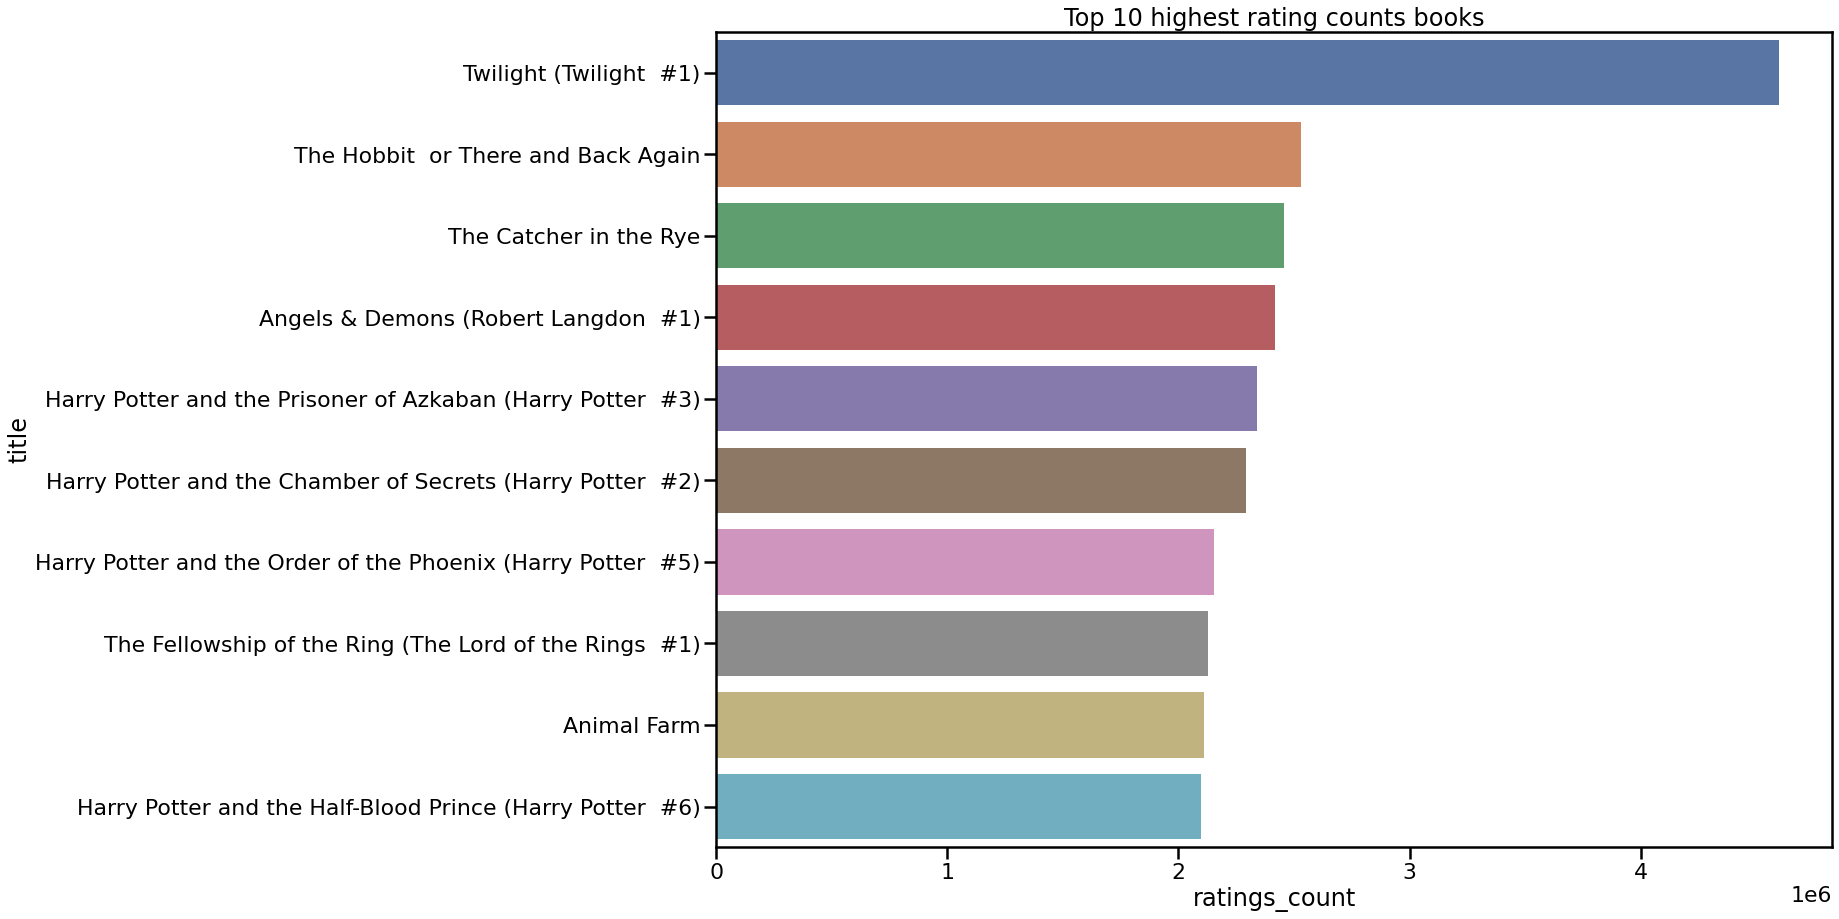

In [8]:
#sns.set_context('poster')
#plt.figure(figsize=(20,15))
rating=df.sort_values('ratings_count',ascending=False).head(10).set_index('title')
plt.figure(figsize=(20,15))
sns.barplot(rating['ratings_count'],rating.index,palette='deep')
plt.title("Top 10 highest rating counts books")
plt.show()

In [9]:
rating['authors']

title
Twilight (Twilight  #1)                                                                 Stephenie Meyer
The Hobbit  or There and Back Again                                                      J.R.R. Tolkien
The Catcher in the Rye                                                                    J.D. Salinger
Angels & Demons (Robert Langdon  #1)                                                          Dan Brown
Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)                  J.K. Rowling/Mary GrandPré
Harry Potter and the Chamber of Secrets (Harry Potter  #2)                   J.K. Rowling/Mary GrandPré
Harry Potter and the Order of the Phoenix (Harry Potter  #5)                 J.K. Rowling/Mary GrandPré
The Fellowship of the Ring (The Lord of the Rings  #1)                                   J.R.R. Tolkien
Animal Farm                                                     George Orwell/Boris Grabnar/Peter Škerl
Harry Potter and the Half-Blood Prince (Harry Potter  #6) 

The most popular one's here in the top 10 are mostly fictional novel, which we can see is undoubtedly a preferred choice among readers now a days. With Twilight by Stephenie Meyer having the top place and 4 classic book from the series HarryPotter by J.K.Rowling taking places in top 10 wiht highest ratings. 
Yet, when we glance at the first and fifth book of Harry Potter, we can also notice that there has been a ridiculously huge margin in the number of readers/ratings for the books, signifying that there were people who did not pick up the next book in the series and/or only found the first book to touch their hearts up to an extent to drop a vote.


# Average rating

We can devise the top 10 book wirh top raitngs also

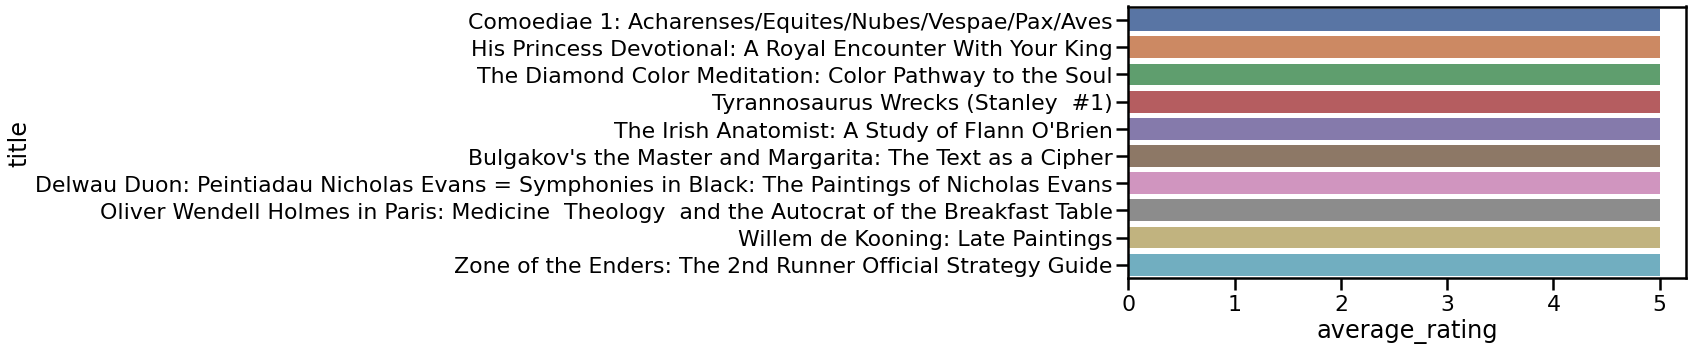

In [10]:
plt.figure(figsize=(10,5))
average_rating=df.sort_values('average_rating',ascending=False).head(10).set_index('title')
sns.barplot(average_rating['average_rating'],average_rating.index,palette="deep")
plt.show()

Comoediae 1, His princess Devotional and all hese are the books highly rated actually rated all 5 here .

# Author's with max books

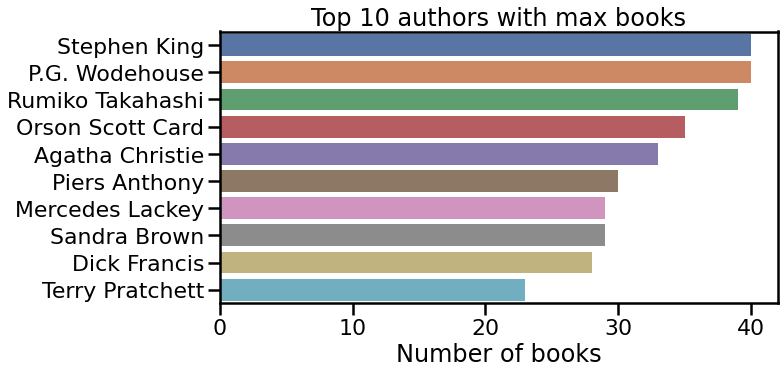

In [11]:
plt.figure(figsize=(10,5))
author=df['authors'].value_counts()[:10]
sns.barplot(author,author.index,palette='deep')
plt.title('Top 10 authors with max books')
plt.xlabel("Number of books")
plt.show()

We can see from the above plot that P.G.Wodehouse has the most number of books in the list - although a lot of them might be just various publications for the same book, considering the fact that her work has been here for quite a while, spanning decades.

From the names in the list, we can again gather that most of the authors have either been writing for decades, churning numerous books from time to time, or are authors who are regaled as the 'classics' in our history.

It seems, hype does play a role in this.

# Highest text review count

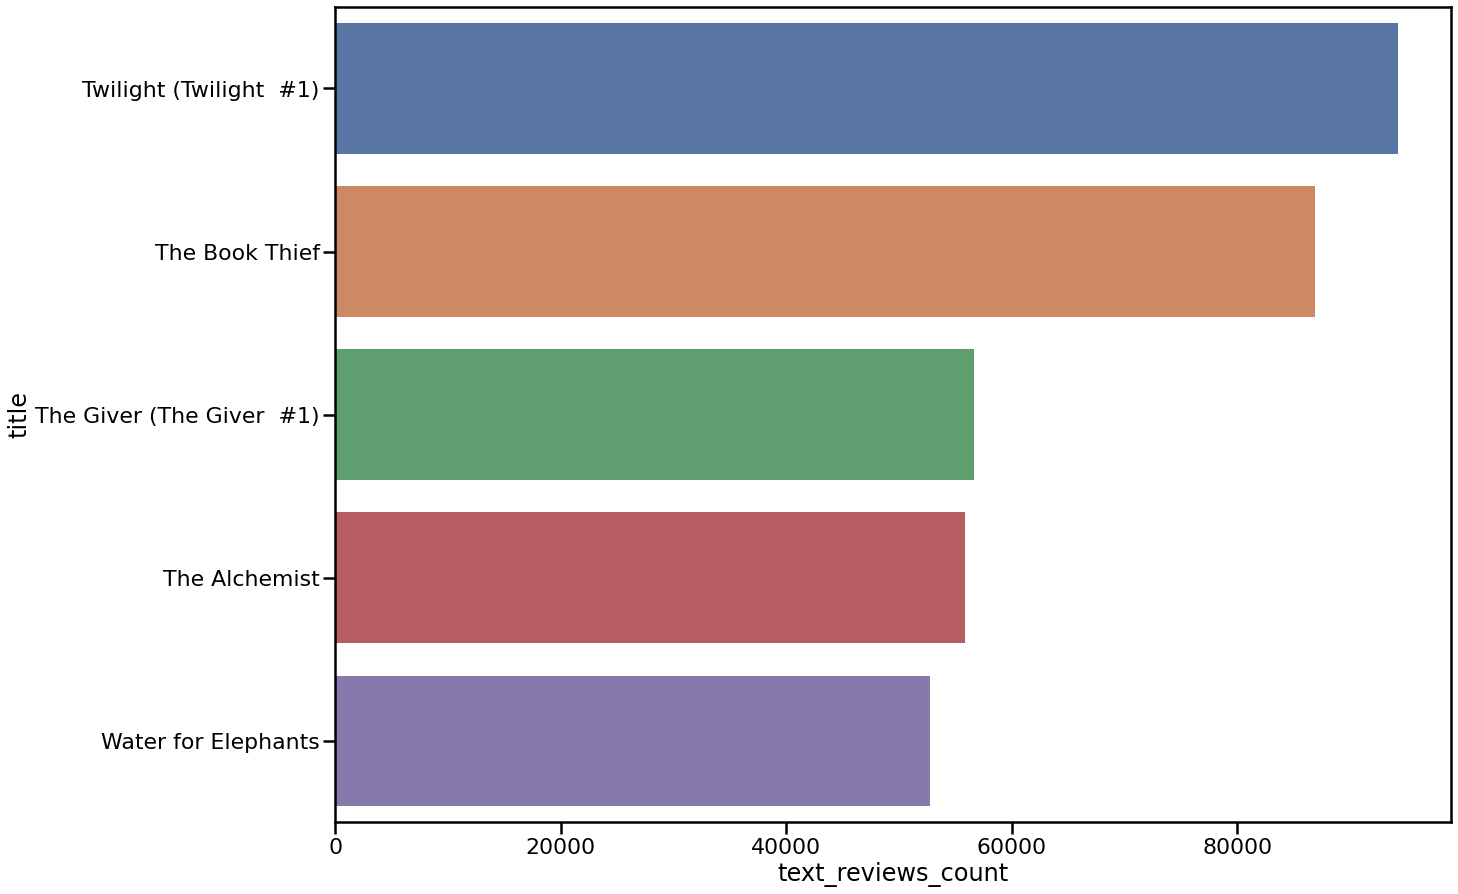

In [12]:
plt.figure(figsize=(20,15))
text_review=df.sort_values('text_reviews_count',ascending=False).head(5).set_index('title')
sns.barplot(text_review['text_reviews_count'],text_review.index,palette='deep')
plt.show()

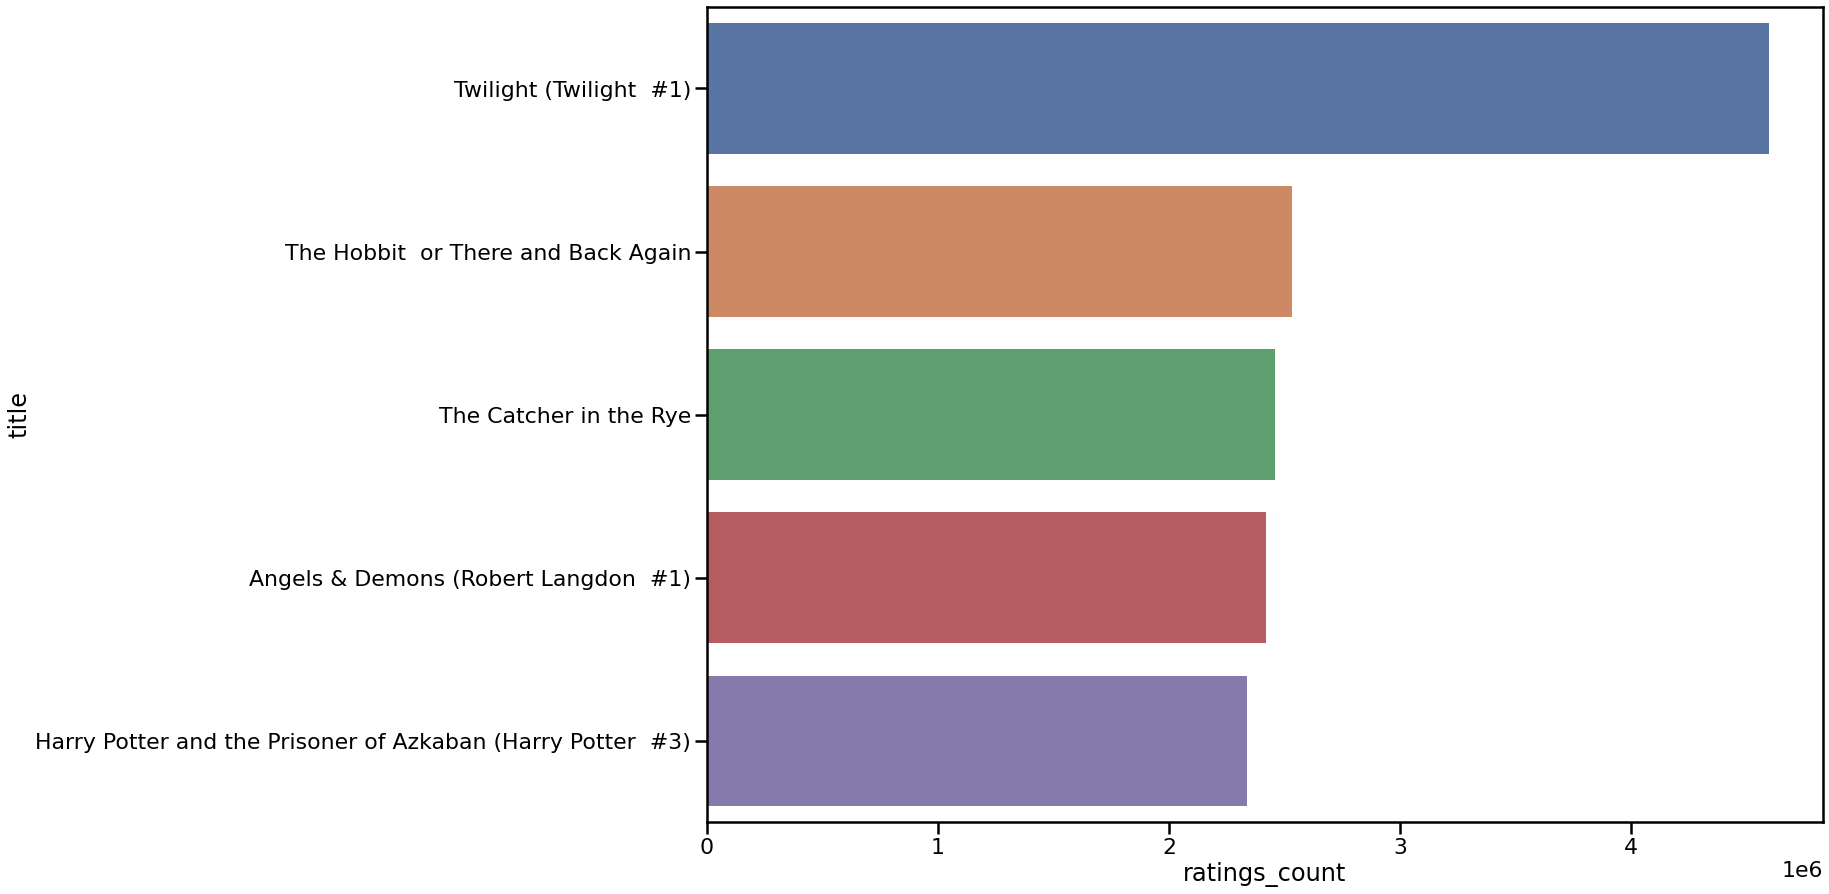

In [13]:
plt.figure(figsize=(20,15))
review_count=df.sort_values('ratings_count',ascending=False).head(5).set_index('title')
sns.barplot(review_count['ratings_count'],review_count.index,palette='deep')
plt.show()

In [17]:
df['Rating_vise_people']=df['ratings_count']/df['average_rating']
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,Rating_vise_people
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000,1.109800e+04
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099,4.492788e+03
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589,2.828252e+04
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000,2.701827e+01
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000,1.899061e+02
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000,1.261615e+03
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000,1.280687e+06


The plot depects the top 5 books with highest text review counts. Again Twilight being at the top of teh list following by The Book theif, The Giver and the Best seller The Alchemist by Paulo Coelho. The number of people giving text reviews for these books are gigantic showing the popularity and success of the books and there auhtors.

# comparing overall performance of these authors 

As we have analyised different aspects of this data, we have come to the point to choose some top auhtors from these plots and then compare them in order to provide the nest recommendatioin for the books.

In [23]:
# we will be deducing the top authors from all the above plots
# l1 here is the list of top authors wiht books having highest text_review counts.
l1=list(text_review['authors'])

# l2 is the list of authors having books of highest review counts.
lo=set(review_count['authors'])
l2=list(lo)

# l3 is the list of authors with maximum books
ll = df['authors'].value_counts().head(5)
l3=list(ll.index)

# l_final is the final list with all the selected auhtors. 
lf=l1+l2+l3
lf2=set(lf)
l_final=list(lf2)
l_final

['J.K. Rowling/Mary GrandPré',
 'J.D. Salinger',
 'J.R.R. Tolkien',
 'Lois Lowry',
 'Markus Zusak/Cao Xuân Việt Khương',
 'Rumiko Takahashi',
 'Stephenie Meyer',
 'Agatha Christie',
 'Orson Scott Card',
 'Dan Brown',
 'P.G. Wodehouse',
 'Stephen King',
 'Paulo Coelho/Alan R. Clarke/Özdemir İnce',
 'Sara Gruen']

Here i have made a function "new data" to conactinate a dataframe with all the details of the authors that we selected in l_final list

In [24]:
def new_data(lff):
    b=pd.DataFrame()
    for i in range(len(lff)):
        a=df[df['authors']==lff[i]].sort_values('ratings_count',ascending=False).head(1)
        b=pd.concat([b,a])
    return b

Final_data=new_data(l_final)
Final_data

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Rating_vise_people
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,5.130669e+05
1462,5107,The Catcher in the Rye,J.D. Salinger,3.80,0316769177,9780316769174,eng,277,2457092,43499,1/30/2001,Back Bay Books,6.466032e+05
1697,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,0618260307,9780618260300,eng,366,2530894,32871,8/15/2002,Houghton Mifflin,5.927152e+05
1069,3636,The Giver (The Giver #1),Lois Lowry,4.13,0385732554,9780385732550,eng,208,1585589,56604,1/24/2006,Ember,3.839199e+05
5270,19063,The Book Thief,Markus Zusak/Cao Xuân Việt Khương,4.37,0375831002,9780375831003,eng,552,1516367,86881,3/14/2006,Alfred A. Knopf,3.469947e+05
6273,23686,Ranma ½ Vol. 1 (Ranma ½ (US 2nd) #1),Rumiko Takahashi,4.15,1569319626,9781569319628,eng,304,29058,309,5/7/2003,VIZ Media LLC,7.001928e+03
10336,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,0316015849,9780316015844,eng,501,4597666,94265,9/6/2006,Little Brown and Company,1.280687e+06
4518,16299,And Then There Were None,Agatha Christie,4.26,0312330871,9780312330873,eng,264,625767,18785,5/3/2004,St. Martin's Press,1.468937e+05
2226,7967,Speaker for the Dead (Ender's Saga #2),Orson Scott Card,4.07,0812550757,9780812550757,eng,382,190379,6637,8/15/1994,Tor Books,4.677617e+04
307,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,1416524797,9781416524793,eng,736,2418736,21303,4/1/2006,Pocket Books,6.217830e+05


From the above dataframe i have took a ratio of rating_count and average_rating (rating_count/avergae_ratings) column via making a new column named "Ratio" which hepled me to classify the top 5 authors with there best 5 books in the final dataframe named "Final_data".

In [25]:
Final_data['Ratio']=Final_data['ratings_count']/Final_data['average_rating']
Final_data.sort_values('Ratio',ascending=False).head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Rating_vise_people,Ratio
10336,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,0316015849,9780316015844,eng,501,4597666,94265,9/6/2006,Little Brown and Company,1.280687e+06,1.280687e+06
1462,5107,The Catcher in the Rye,J.D. Salinger,3.80,0316769177,9780316769174,eng,277,2457092,43499,1/30/2001,Back Bay Books,6.466032e+05,6.466032e+05
307,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,1416524797,9781416524793,eng,736,2418736,21303,4/1/2006,Pocket Books,6.217830e+05,6.217830e+05
1697,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,0618260307,9780618260300,eng,366,2530894,32871,8/15/2002,Houghton Mifflin,5.927152e+05,5.927152e+05
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,5.130669e+05,5.130669e+05


In [35]:
dff=df['title'].value_counts()
dff['title']['Twilight (Twilight #1)']

KeyError: 'title'

In [26]:
Final_data.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,Rating_vise_people,Ratio
count,14.000000,14.000000,1.400000e+01,14.000000,1.400000e+01,14.000000,1.400000e+01,1.400000e+01
mean,14069.714286,4.109286,9.780730e+12,392.071429,1.584037e+06,37282.642857,3.966176e+05,3.966176e+05
std,14191.151297,0.253786,5.543746e+08,165.570094,1.247312e+06,29680.339946,3.369587e+05,3.369587e+05
min,5.000000,3.590000,9.780061e+12,197.000000,1.559800e+04,309.000000,3.652927e+03,3.652927e+03
25%,4003.750000,3.935000,9.780332e+12,274.000000,7.139590e+05,16025.000000,1.681403e+05,1.681403e+05
50%,9777.500000,4.140000,9.780445e+12,350.500000,1.550978e+06,34598.000000,3.654573e+05,3.654573e+05
75%,18394.000000,4.267500,9.781266e+12,484.500000,2.398948e+06,55072.000000,5.728031e+05,5.728031e+05
max,43641.000000,4.560000,9.781586e+12,736.000000,4.597666e+06,94265.000000,1.280687e+06,1.280687e+06


## Posterior Probability

This finally provided us with our top 5 books - 

1. Twilight is a 2005 young adult vampire-romance novel by author Stephenie Meyer, which was then adapted into a film.

2. The Catcher in the Rye is a novel by J. D. Salinger, partially published in serial form in 1945–1946 and as a novel in 1951.

3. Angel & Demons is a 2000 bestselling mystery-thriller novel written by American author Dan Brown and published by Pocket Books and then by Corgi Books. 

4. The Hobbit or There and Back again is a children's fantasy novel by English author J. R. R. Tolkien. It was published on 21 September 1937 to wide critical acclaim, being nominated for the Carnegie Medal and awarded a prize from the New York Herald Tribune for best juvenile fiction.

5. Harry Potter and the Prisoner of Azkaban Harry Potter and the Prisoner of Azkaban is a fantasy novel written by British author J. K. Rowling and is the third in the Harry Potter series. 